In [1]:
%matplotlib inline

In [2]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
from albumentations import (HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
                            Transpose, ShiftScaleRotate, Blur, Distort1, Distort2, HueSaturationValue,
                            IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
                            IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose)

In [4]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')

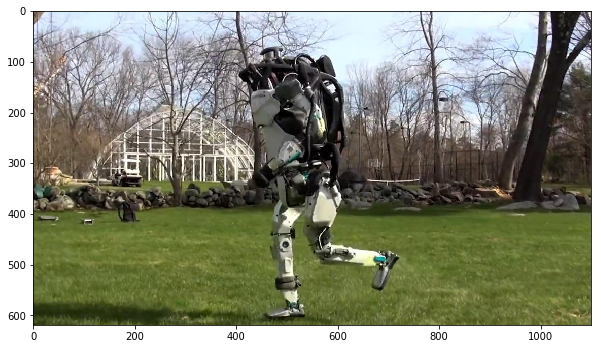

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [7]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

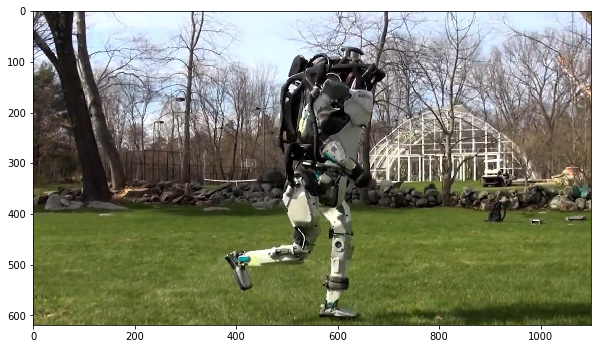

In [8]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)

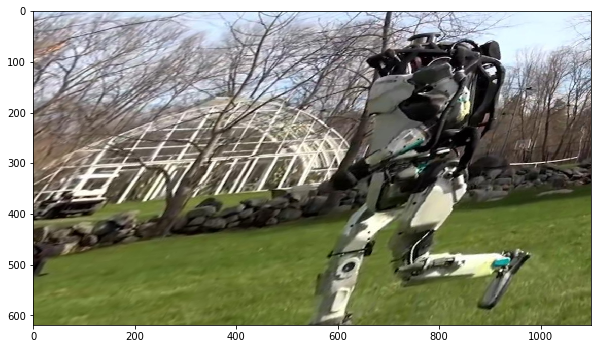

In [10]:
aug = IAAPerspective(scale=0.2, p=1)
augment_and_show(aug, image)

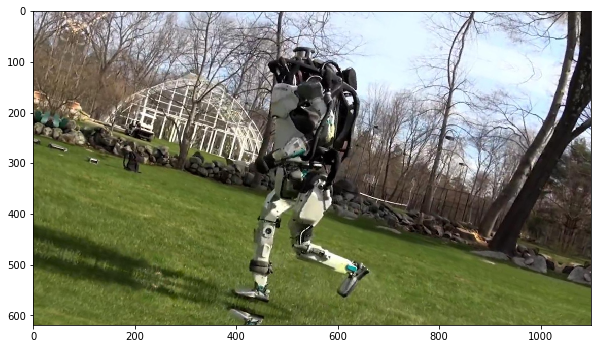

In [11]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

In [12]:
def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        Distort1(),
        Distort2(),
        HueSaturationValue()
    ], p=p)

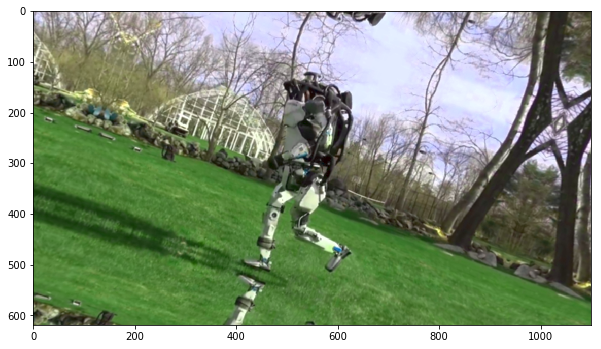

In [14]:
aug = augment_flips_color(p=1)
augment_and_show(aug, image)

In [15]:
def strong_aug(p=.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            Distort1(p=0.3),
            Distort2(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clipLimit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)


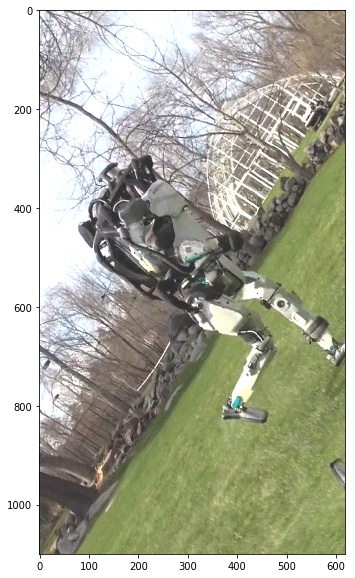

In [43]:
aug = strong_aug(p=1)
augment_and_show(aug, image)